Сравнение моделей

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sf
import statsmodels.api as sm

In [2]:
df=pd.read_csv("../resources/titanik_full_data_1.csv",sep="\t")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


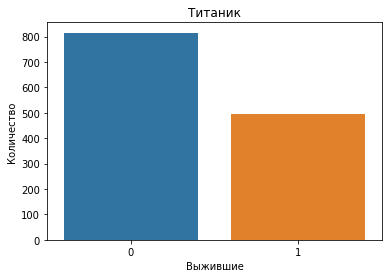

In [4]:
sns.countplot(x="Survived",data=df)
plt.xlabel("Выжившие")
plt.ylabel("Количество")
plt.title("Титаник");

Применение логистической регрессии

GLM - General linear Models

с() - категориальные переменные

In [5]:
logit_res=sf.glm("Survived~C(Pclass)+C(Sex)+Age",df,family=sm.families.Binomial()).fit()

In [6]:
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                 1046
Model:                            GLM   Df Residuals:                     1041
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -398.21
Date:                Mon, 30 Nov 2020   Deviance:                       796.42
Time:                        18:57:03   Pearson chi2:                 1.10e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.9568      0.372     10.641      0.000       3.228       4.686
C(Pclass)[T.2]    -1.2370      0.256     -4.833      0.000      -1.739      -0.735
C(Pclass)[T.3]    -2.2390      0.256     -8.759      0.000      -2.740      -1.738
C(Sex)[T.male]    -3.5601      0.196    -18.158      0.000      -3.944      -3.176
Age               -0.0313      0.007     -4.407      0.000      -0.045      -0.017
==================================================================================
"""

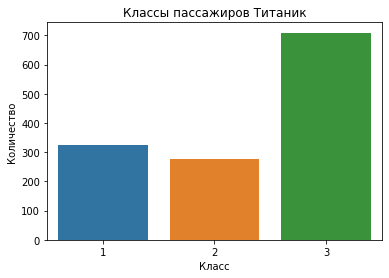

In [7]:
sns.countplot(x="Pclass",data=df)
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.title("Классы пассажиров Титаник");

Мультиномиальная логистическая регрессия

In [8]:
multi_res=sf.mnlogit("Pclass~C(Sex)+Age",df).fit()
multi_res.summary()

Optimization terminated successfully.
         Current function value: 0.944697
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                 Pclass   No. Observations:                 1046
Model:                        MNLogit   Df Residuals:                     1040
Method:                           MLE   Df Model:                            4
Date:                Mon, 30 Nov 2020   Pseudo R-squ.:                  0.1028
Time:                        18:57:03   Log-Likelihood:                -988.15
converged:                       True   LL-Null:                       -1101.4
Covariance Type:            nonrobust   LLR p-value:                 7.608e-48
==================================================================================
      Pclass=2       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.4181      0.253      5.611      0.000       0.923       1.913
C(Sex)[T.male]     0.4934      0.183      2.691      0.007       0.134       0.853
Age               -0.0522      0.007     -7.728      0.000      -0.065      -0.039
----------------------------------------------------------------------------------
      Pclass=3       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.6021      0.239     10.900      0.000       2.134       3.070
C(Sex)[T.male]     1.0119      0.174      5.824      0.000       0.671       1.352
Age               -0.0843      0.007    -12.514      0.000      -0.098      -0.071
==================================================================================
"""

Порядковая регрессия

In [9]:
from bevel.linear_ordinal_regression import OrderedLogit

In [10]:
vino=pd.read_csv("../resources/winequality-red.csv",sep=";")
vino.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Text(0.5, 1.0, 'Рейтинг вин')

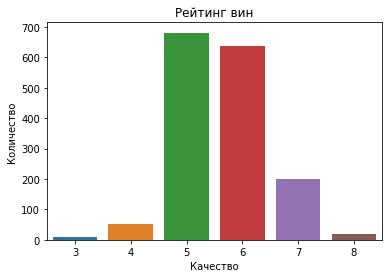

In [11]:
sns.countplot(x="quality",data=vino)
plt.xlabel("Качество")
plt.ylabel("Количество")
plt.title("Рейтинг вин")

In [12]:
Y=vino.quality
X=vino.drop("quality", axis=1)

In [13]:
model=OrderedLogit()
# сперва НП, затем ЗП
model.fit(X,Y);

In [14]:
model.print_summary()

n=1599
                         beta  se(beta)      p  lower 0.95  upper 0.95     
attribute names                                                            
fixed acidity          0.1284    0.0823 0.1188     -0.0329      0.2898     
volatile acidity      -3.3957    0.4031 0.0000     -4.1857     -2.6058  ***
citric acid           -0.8022    0.4622 0.0827     -1.7081      0.1038    .
residual sugar         0.0878    0.0480 0.0670     -0.0062      0.1818    .
chlorides             -5.1416    1.3595 0.0002     -7.8062     -2.4770  ***
free sulfur dioxide    0.0137    0.0068 0.0444      0.0003      0.0270    *
total sulfur dioxide  -0.0111    0.0024 0.0000     -0.0158     -0.0065  ***
density              -76.5142   68.3657 0.2631   -210.5085     57.4800     
pH                    -0.8469    0.6009 0.1587     -2.0246      0.3309     
sulphates              2.9016    0.3675 0.0000      2.1814      3.6218  ***
alcohol                0.8308    0.0852 0.0000      0.6637      0.9978  ***
---
S

###### .Somers' D = 0.481 - это коэффициент детерменации, но с диапазоном [-1;1]

In [15]:
card=pd.read_csv("../resources/credit_card__1_.csv")
card.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


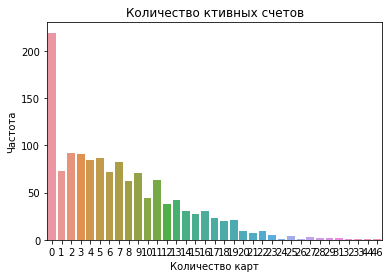

In [16]:
sns.countplot(x="active",data=card)
plt.xlabel("Количество карт")
plt.ylabel("Частота")
plt.title("Количество активных счетов");

Модель Пуассона

In [17]:
poisson=sf.glm("active~age+income+expenditure+C(owner)+C(selfemp)",family=sm.families.Poisson(),data=card).fit()
poisson.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 active   No. Observations:                 1319
Model:                            GLM   Df Residuals:                     1313
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5614.4
Date:                Mon, 30 Nov 2020   Deviance:                       7142.4
Time:                        18:57:04   Pearson chi2:                 6.89e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.4000      0.037     37.440      0.000       1.327       1.473
C(owner)[T.yes]       0.4033      0.023     17.409      0.000       0.358       0.449
C(selfemp)[T.yes]     0.0141      0.040      0.355      0.723      -0.064       0.092
age                   0.0062      0.001      5.648      0.000       0.004       0.008
income                0.0361      0.006      5.752      0.000       0.024       0.048
expenditure        2.925e-05   3.75e-05      0.779      0.436   -4.43e-05       0.000
=====================================================================================
"""

C(selfemp)[T.yes], expenditure - p-уровень значимости меньше 5 % 

#### Сверхдисперсия

In [18]:
poisson.pearson_chi2/poisson.df_resid
# pearson_chi2 - остатки распределения
# df_resid - степени свободы остатков

5.24993999692431

Дисперсия в 5 раз превышает среднее

#### Отрицательное биноминальное распределение

In [19]:
neg=sf.glm("active~age+income+expenditure+C(owner)+C(selfemp)",data=card,
           family=sm.families.NegativeBinomial(alpha=0.15)).fit()
# alpha - параметр дисперсии
neg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 active   No. Observations:                 1319
Model:                            GLM   Df Residuals:                     1313
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4429.3
Date:                Mon, 30 Nov 2020   Deviance:                       3940.9
Time:                        18:57:04   Pearson chi2:                 3.44e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.3690      0.054     25.206      0.000       1.263       1.475
C(owner)[T.yes]       0.3984      0.033     11.996      0.000       0.333       0.463
C(selfemp)[T.yes]     0.0055      0.059      0.094      0.925      -0.110       0.121
age                   0.0069      0.002      4.263      0.000       0.004       0.010
income                0.0393      0.010      4.099      0.000       0.021       0.058
expenditure        2.445e-05   5.63e-05      0.434      0.664   -8.59e-05       0.000
=====================================================================================
"""

Сверхдисперсия

In [20]:
neg.pearson_chi2/neg.df_resid

2.6196780724869027

Дисперсия в 2,6 раз превышает среднее

#### Информационный критерий Акаике
для сравнения модели Пуассона и отрицательной биномиальной модели

Полезен только для сравнения моделей - чем ниже, тем лучше модель

In [21]:
poisson.aic

11240.817775454601

In [22]:
neg.aic

8870.632884339047

Предиктивная способность отрицательной биномиальной модели лучше

### Регрессия с избытком нулей

Кодировка категориальных данных

In [23]:
card.owner=np.where(card.owner=="yes",1,0)
card.selfemp=np.where(card.selfemp=="yes",1,0)

In [24]:
Y=card.active #ЗП
X=card.loc[:,["age", "income", "expenditure", "owner", "selfemp"]] #НП
X=sm.add_constant(X) #Intercept

In [26]:
zeroinf=sm.ZeroInflatedPoisson(Y,X).fit(maxiter=100,method="ncg")
zeroinf.summary()

/usr/lib/python3/dist-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Optimization terminated successfully.
         Current function value: 3.899929
         Iterations: 4
         Function evaluations: 6
         Gradient evaluations: 6
         Hessian evaluations: 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedPoisson Regression Results                    
===============================================================================
Dep. Variable:                  active   No. Observations:                 1319
Model:             ZeroInflatedPoisson   Df Residuals:                     1313
Method:                            MLE   Df Model:                            5
Date:                 Mon, 30 Nov 2020   Pseudo R-squ.:                -0.05893
Time:                         18:57:10   Log-Likelihood:                -5144.0
converged:                        True   LL-Null:                       -4857.8
Covariance Type:             nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const     0.0999      0.055      1.812      0.070      -0.008       0.208
const             1.7967      0.037     48.172      0.000       1.724       1.870
age               0.0093      0.001      8.656      0.000       0.007       0.011
income            0.0019      0.007      0.280      0.779      -0.011       0.015
expenditure       0.0001   3.81e-05      2.691      0.007    2.79e-05       0.000
owner             0.0017      0.023      0.073      0.942      -0.043       0.046
selfemp           0.0008      0.039      0.022      0.983      -0.075       0.077
=================================================================================
"""

Сравнение моделей

In [27]:
zeroinf.aic

10300.01303290444

Критерий Акаике выше, чем у отрицательного биноминального распределения

In [28]:
zeroinf_2=sm.ZeroInflatedNegativeBinomialP(Y,X).fit(maxiter=100,method="ncg")
zeroinf_2.summary()

Optimization terminated successfully.
         Current function value: 3.055914
         Iterations: 5
         Function evaluations: 9
         Gradient evaluations: 9
         Hessian evaluations: 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                     ZeroInflatedNegativeBinomialP Regression Results                    
=========================================================================================
Dep. Variable:                            active   No. Observations:                 1319
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                     1313
Method:                                      MLE   Df Model:                            5
Date:                           Mon, 30 Nov 2020   Pseudo R-squ.:                -0.03018
Time:                                   19:03:26   Log-Likelihood:                -4030.7
converged:                                  True   LL-Null:                       -3912.7
Covariance Type:                       nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const    -0.5152      0.058     -8.820      0.000      -0.630      -0.401
const             1.4543      0.087     16.765      0.000       1.284       1.624
age               0.0097      0.003      3.757      0.000       0.005       0.015
income            0.0352      0.016      2.234      0.026       0.004       0.066
expenditure    5.109e-05   9.08e-05      0.563      0.573      -0.000       0.000
owner             0.3590      0.050      7.112      0.000       0.260       0.458
selfemp           0.0029      0.090      0.032      0.974      -0.173       0.178
alpha             0.4517      0.032     14.330      0.000       0.390       0.514
=================================================================================
"""

In [30]:
zeroinf_2.aic

8073.499838279868

Самый низкий критерий Акаике

ZeroInflated - лучшая модель для предиктивной аналитики 

### Анализ выживаемости


In [32]:
import lifelines as lf